In [1]:
#Importing Modules
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier
import numpy as np
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.metrics import balanced_accuracy_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Loading the CSV file and Creating DataFrame
url = 'https://raw.githubusercontent.com/AnuragPhukan/Breast_Cancer_Detection/main/TrainDataset2023.csv'
train_df = pd.read_csv(url)

# Removing unwanted Columns
train_df = train_df.drop(columns=['ID'])
train_df = train_df.drop(columns=['RelapseFreeSurvival (outcome)'])
train_df

pCR (outcome)   Age  ER  PgR  HER2  TrippleNegative  ChemoGrade  \
0                1  41.0   0    0     0                1           3   
1                0  39.0   1    1     0                0           3   
2                1  31.0   0    0     0                1           2   
3                0  35.0   0    0     0                1           3   
4                0  61.0   1    0     0                0           2   
..             ...   ...  ..  ...   ...              ...         ...   
395              0  58.5   1    0     1                0           3   
396              0  34.3   0    0     0                1           3   
397              0  53.3   0    0     0                1           2   
398              0  68.8   1    0     0                0           3   
399              0  46.0   1    0     0                0           2   

     Proliferation  HistologyType  LNStatus  ...  \
0                3              1         1  ...   
1                3              1         1  ...   
2                1              1         0  ...   
3                3              1         1  ...   
4                1              1         0  ...   
..             ...            ...       ...  ...   
395              2              1         1  ...   
396              3              1         0  ...   
397              1              1         0  ...   
398              3              1         1  ...   
399              1              1         1  ...   

     original_glszm_SmallAreaHighGrayLevelEmphasis  \
0                                         0.517172   
1                                         0.444391   
2                                         0.534549   
3                                         0.506185   
4                                         0.462282   
..                                             ...   
395                                       0.476493   
396                                       0.418382   
397                                       0.527779   
398                                       0.313693   
399                                       0.670229   

     original_glszm_SmallAreaLowGrayLevelEmphasis  original_glszm_ZoneEntropy  \
0                                        0.375126                    3.325332   
1                                        0.444391                    3.032144   
2                                        0.534549                    2.485848   
3                                        0.506185                    2.606255   
4                                        0.462282                    2.809279   
..                                            ...                         ...   
395                                      0.476493                    2.453583   
396                                      0.418382                    2.995603   
397                                      0.527778                    1.500000   
398                                      0.313693                    3.573557   
399                                      0.670229                    1.857045   

     original_glszm_ZonePercentage  original_glszm_ZoneVariance  \
0                         0.002314                 3.880772e+06   
1                         0.005612                 2.372010e+06   
2                         0.006752                 1.540027e+06   
3                         0.003755                 6.936741e+06   
4                         0.006521                 1.265399e+06   
..                             ...                          ...   
395                       0.003229                 2.327038e+06   
396                       0.004243                 1.005061e+06   
397                       0.003728                 2.132007e+05   
398                       0.001112                 2.008034e+07   
399                       0.006706                 5.609262e+05   

     original_ngtdm_Busyness  original_ngtdm_Coarseness  \
0                 473.464852 

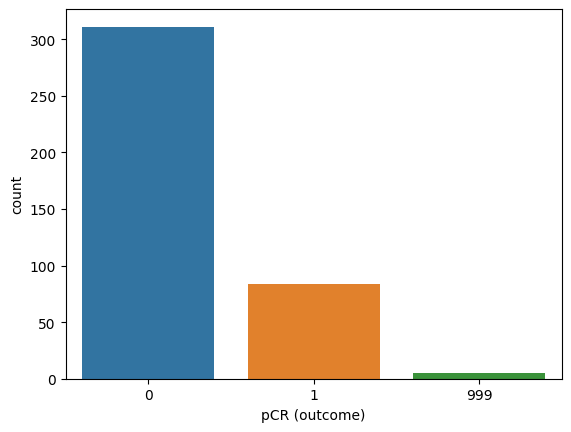

In [3]:
sns.countplot(x='pCR (outcome)', data=train_df)
plt.show()

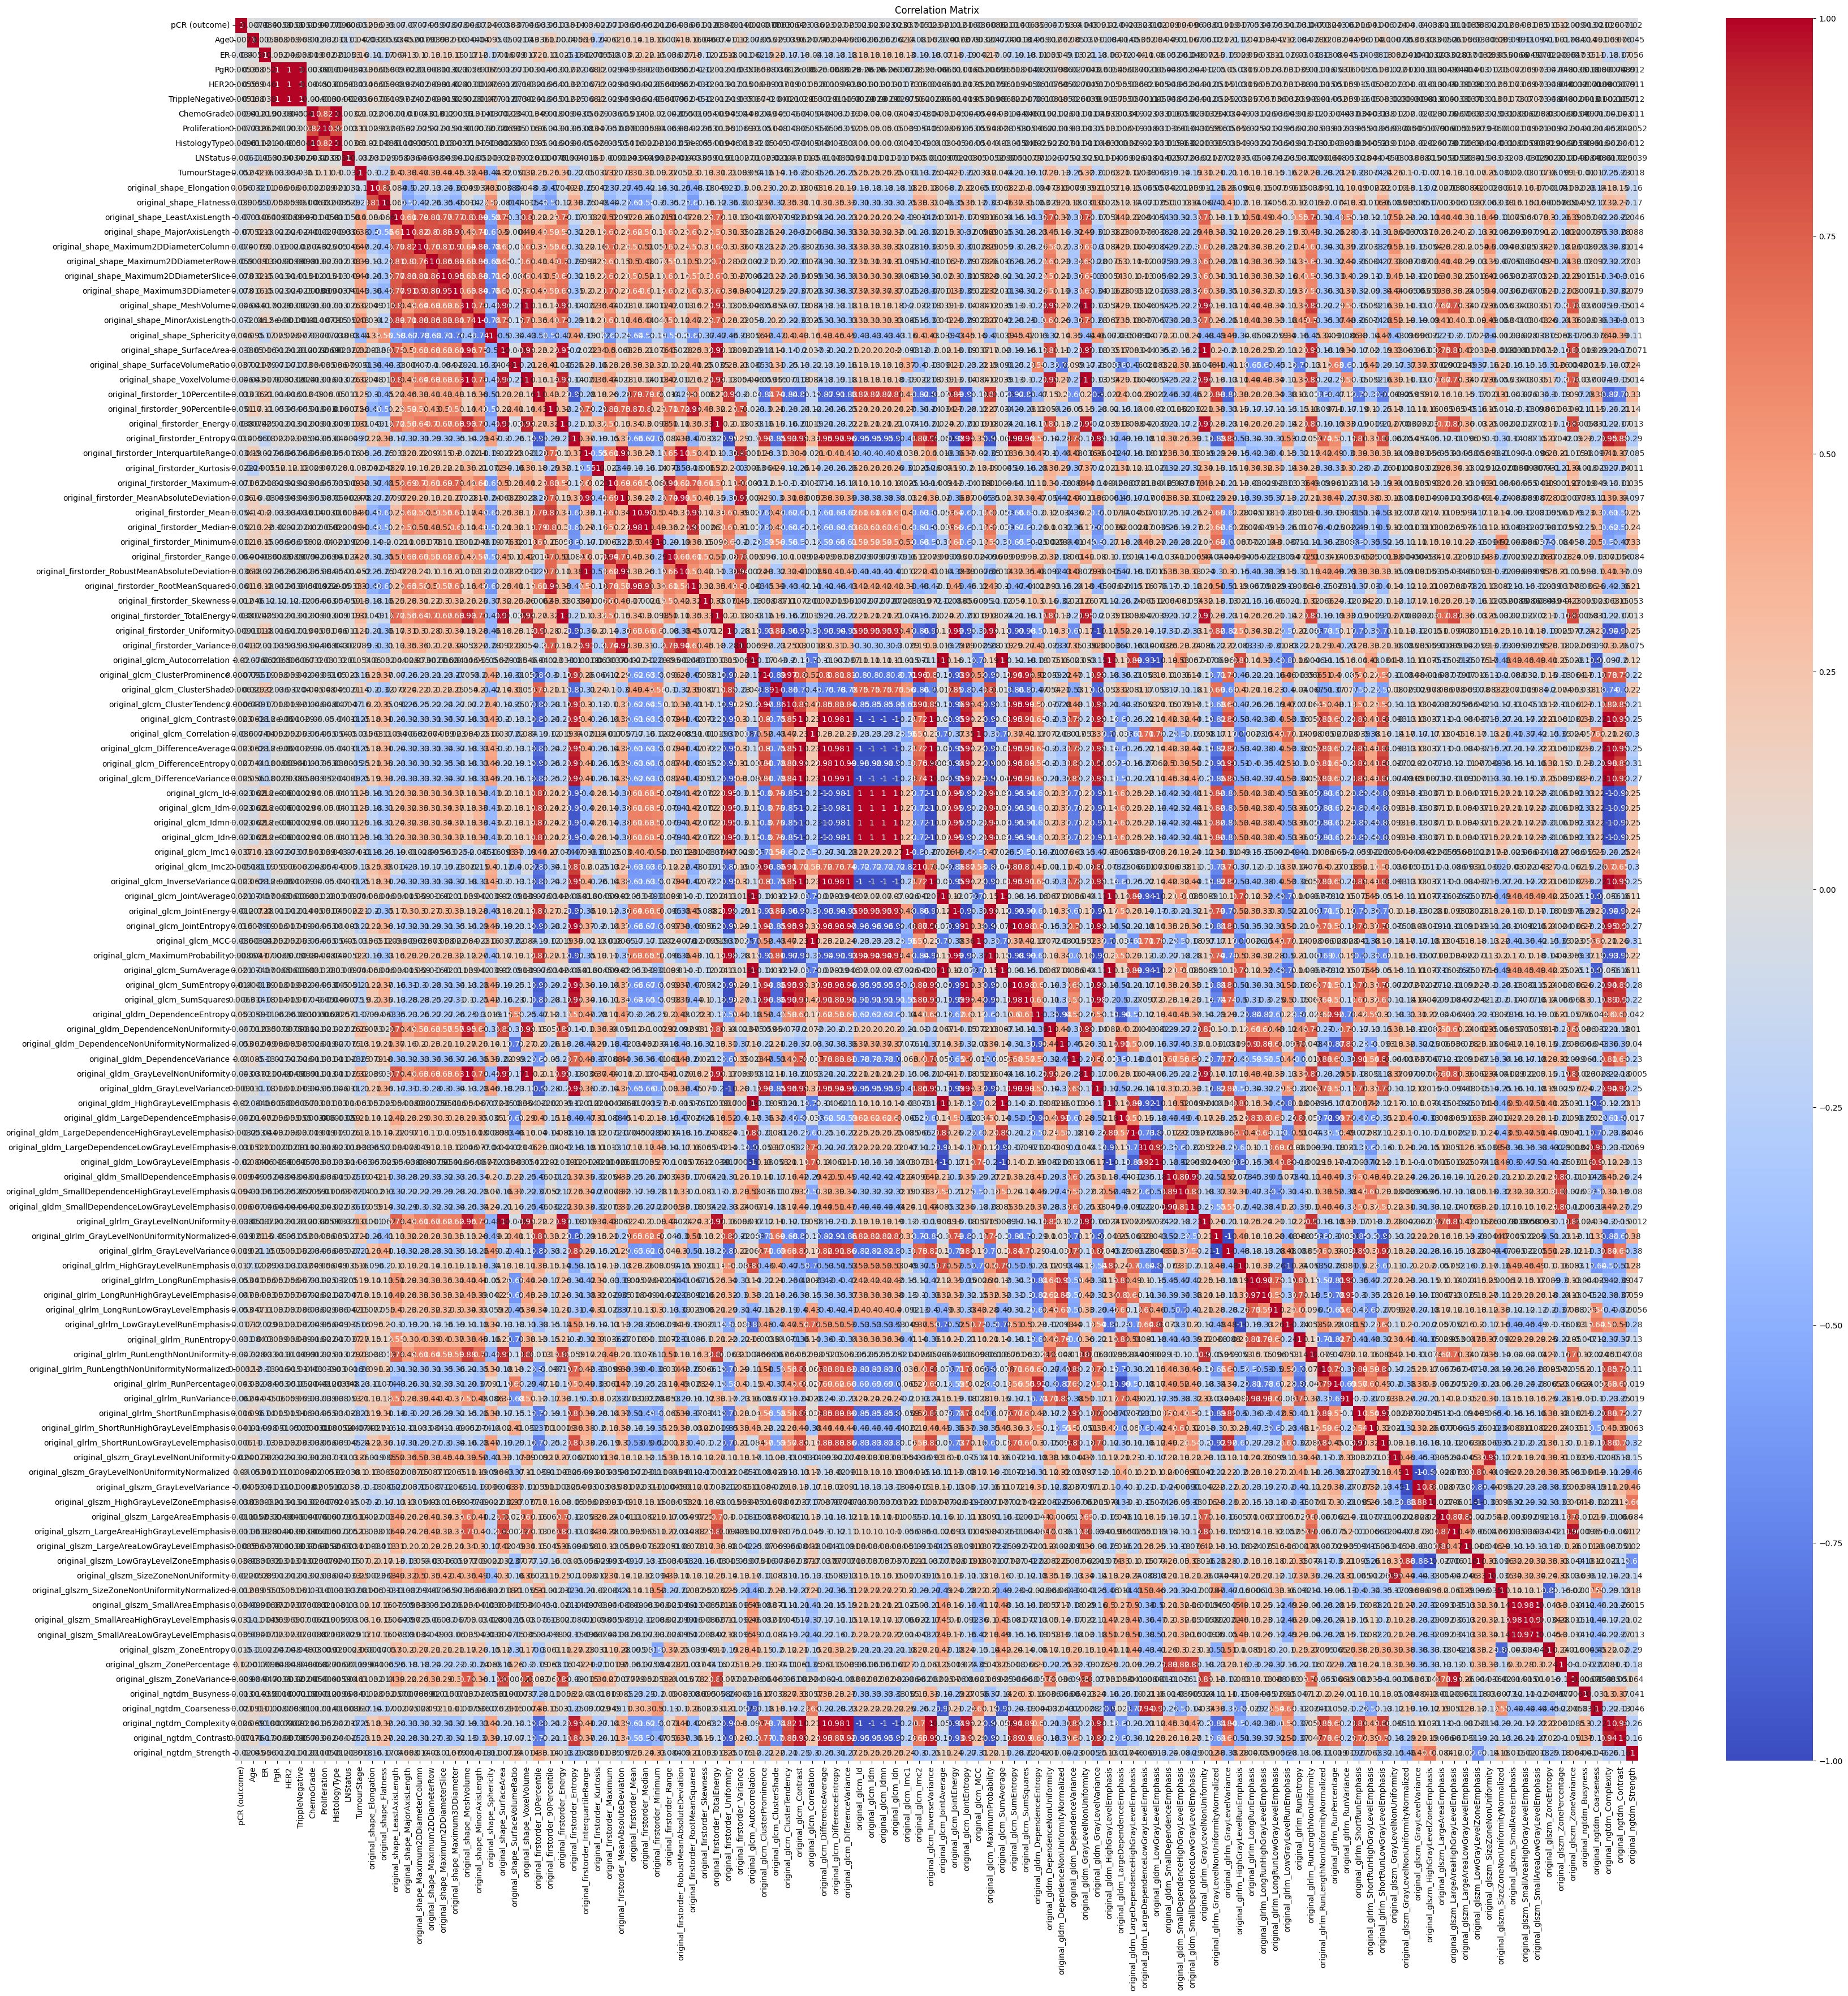

In [4]:
#Correlation Mapping
plt.figure(figsize=(40, 40))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [5]:
#Remove Rows with 999 in pCR (Outcome) column
train_df = train_df[train_df['pCR (outcome)'] != 999]

# Replace '999' with numpy.nan
train_df = train_df.replace(999, np.nan)
train_df.head(227)

pCR (outcome)        Age  ER  PgR  HER2  TrippleNegative  ChemoGrade  \
0                1  41.000000   0  0.0   0.0              1.0         3.0   
1                0  39.000000   1  1.0   0.0              0.0         3.0   
2                1  31.000000   0  0.0   0.0              1.0         2.0   
3                0  35.000000   0  0.0   0.0              1.0         3.0   
4                0  61.000000   1  0.0   0.0              0.0         2.0   
..             ...        ...  ..  ...   ...              ...         ...   
223              1  61.000000   0  0.0   0.0              1.0         3.0   
224              0  34.280630   0  0.0   1.0              0.0         3.0   
225              1  47.255305   1  1.0   0.0              0.0         NaN   
226              0  59.876797   0  0.0   0.0              1.0         2.0   
227              0  62.603696   1  1.0   0.0              0.0         2.0   

     Proliferation  HistologyType  LNStatus  ...  \
0              3.0            1.0       1.0  ...   
1              3.0            1.0       1.0  ...   
2              1.0            1.0       0.0  ...   
3              3.0            1.0       1.0  ...   
4              1.0            1.0       0.0  ...   
..             ...            ...       ...  ...   
223            3.0            1.0       0.0  ...   
224            2.0            1.0       1.0  ...   
225            NaN            NaN       1.0  ...   
226            1.0            1.0       0.0  ...   
227            1.0            1.0       1.0  ...   

     original_glszm_SmallAreaHighGrayLevelEmphasis  \
0                                         0.517172   
1                                         0.444391   
2                                         0.534549   
3                                         0.506185   
4                                         0.462282   
..                                             ...   
223                                       0.335900   
224                                       0.370341   
225                                       0.555687   
226                                       0.578288   
227                                       0.441391   

     original_glszm_SmallAreaLowGrayLevelEmphasis  original_glszm_ZoneEntropy  \
0                                        0.375126                    3.325332   
1                                        0.444391                    3.032144   
2                                        0.534549                    2.485848   
3                                        0.506185                    2.606255   
4                                        0.462282                    2.809279   
..                                            ...                         ...   
223                                      0.335900                    3.561721   
224                                      0.370341                    3.401605   
225                                      0.555687                    2.209691   
226                                      0.578288                    2.049452   
227                                      0.441390                    3.244443   

     original_glszm_ZonePercentage  original_glszm_ZoneVariance  \
0                         0.002314                 3.880772e+06   
1                         0.005612                 2.372010e+06   
2                         0.006752                 1.540027e+06   
3                         0.003755                 6.936741e+06   
4                         0.006521                 1.265399e+06   
..                             ...                          ...   
223                       0.002544                 5.169239e+06   
224                       0.003971                 4.623448e+06   
225                       0.000821                 2.507519e+07   
226                       0.001322                 3.944410e+06   
227                       0.001546                 1.106989e+07   

     original_ngtdm_Busyness

In [6]:
#Removing Highly collinear features
def remove_collinear_features(x, threshold):

    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                #print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns=drops)
    return x, drops

In [7]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Splitting dataset into features and target variable
X = train_df.drop(columns=['pCR (outcome)'])
y = train_df['pCR (outcome)']

# Removing the Columns that have collinearity higher than 95%
X, dropped_columns = remove_collinear_features(X, 0.95)
print(dropped_columns, len(dropped_columns))

#Splitting dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

#Data Imputation for missing and null values
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Normalizing the values using scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)
unique, count = np.unique(y_train, return_counts=True)
y_train_count = {k:v for (k, v) in zip(unique, count)}

print(y_train_count)

{'original_glrlm_GrayLevelNonUniformity', 'original_glrlm_RunPercentage', 'original_glszm_SmallAreaLowGrayLevelEmphasis', 'original_firstorder_RootMeanSquared', 'original_firstorder_TotalEnergy', 'original_glszm_SizeZoneNonUniformity', 'original_gldm_HighGrayLevelEmphasis', 'original_firstorder_MeanAbsoluteDeviation', 'original_glcm_ClusterTendency', 'original_glszm_ZoneVariance', 'original_gldm_GrayLevelNonUniformity', 'original_glrlm_LongRunHighGrayLevelEmphasis', 'original_glcm_DifferenceAverage', 'original_glcm_MaximumProbability', 'original_glcm_Id', 'original_glcm_SumAverage', 'original_glrlm_GrayLevelVariance', 'original_ngtdm_Complexity', 'original_firstorder_Energy', 'original_firstorder_Median', 'original_glcm_Imc2', 'original_glcm_DifferenceEntropy', 'original_shape_VoxelVolume', 'original_glrlm_ShortRunLowGrayLevelEmphasis', 'original_glcm_JointAverage', 'original_gldm_LowGrayLevelEmphasis', 'original_gldm_GrayLevelVariance', 'original_firstorder_Uniformity', 'original_glcm

In [8]:
#Using SMOTE for oversampling and balancing the training data
sm = SMOTE(sampling_strategy = 1, random_state=35)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)
print(X_train_res)

[[-0.27238781 -1.07918217 -0.82129672 ... -0.18704371 -0.71071438
   0.33057567]
 [ 1.02381042  0.92662762 -0.82129672 ... -0.18704407 -0.66836141
  -0.24984089]
 [-1.18986089  0.92662762 -0.82129672 ... -0.18704402 -0.69599294
  -0.16700269]
 ...
 [ 0.14275193  0.36733059 -0.82129672 ... -0.18704407  5.49203817
  -0.24764947]
 [-0.96776841 -1.07918217 -0.82129672 ... -0.18704402 -0.61046691
  -0.17378642]
 [-0.28890537 -0.87662245 -0.61539701 ... -0.18704399 -0.5613119
  -0.1280802 ]]


In [9]:
#Unique Values
unique, count = np.unique(y_train_res, return_counts=True)
y_train_count = {k:v for (k, v) in zip(unique, count)}

print(y_train_count)

{0: 277, 1: 277}


## Accuracy Evaluation without Hyperparameter Tuning

In [10]:
# Initialize classifiers without hyperparameter tuning
classifiers = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Bagging Classifier": BaggingClassifier(estimator=RandomForestClassifier()),
    "Adaboost Classifier": AdaBoostClassifier(estimator=RandomForestClassifier())
}

# Train classifiers and evaluate
classification_reports = {}
balanced_scores = {}
normal_scores = {}
for name, clf in classifiers.items():
    clf.fit(X_train_res, y_train_res)
    y_pred = clf.predict(X_test_scaled)
    balanced_scores[name] = balanced_accuracy_score(y_test, y_pred)
    normal_scores[name] = accuracy_score(y_test, y_pred)

# Artificial Neural Network
model = Sequential([
    Dense(X_train_res.shape[1], activation='relu', input_shape=(X_train_res.shape[1],)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_res, y_train_res, epochs=20, batch_size=32, verbose=0)

# Evaluate ANN
y_pred = (model.predict(X_test) > 0.5).astype("int32")
balanced_scores["ANN"] = balanced_accuracy_score(y_test, y_pred)
normal_scores["ANN"] = accuracy_score(y_test, y_pred)

print("Accuracy without tuning hyperparameters")
# Print the scores
print("Balanced Accuracy Scores:")
for name, score in balanced_scores.items():
    print(f"{name}: {score:.4f}")

print("\nNormal Accuracy Scores:")
for name, score in normal_scores.items():
    print(f"{name}: {score:.4f}")

2/2 [==============================] - 0s 6ms/step
Accuracy without tuning hyperparameters
Balanced Accuracy Scores:
Random Forest: 0.5539
SVM: 0.7598
Gradient Boosting: 0.6373
KNN: 0.8529
Logistic Regression: 0.7157
Bagging Classifier: 0.8039
Adaboost Classifier: 0.7353
ANN: 0.5000

Normal Accuracy Scores:
Random Forest: 0.8250
SVM: 0.8250
Gradient Boosting: 0.8500
KNN: 0.7500
Logistic Regression: 0.7500
Bagging Classifier: 0.9000
Adaboost Classifier: 0.9000
ANN: 0.8500


##HyperParameter Tuning


In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Hyperparameter Tuning for Random Forest
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a base model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                          cv=3, n_jobs=-1, verbose=2, scoring='balanced_accuracy')

# Fit the grid search to the data
grid_search.fit(X_train_res, y_train_res)

# Print best parameters
print("Best parameters found: ", grid_search.best_params_)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters found:  {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


In [12]:
from sklearn.svm import SVC
# Hyperparameter Tuning for SVC
# Define the parameter grid
param_grid_svm = {
    'C': [0.01, 0.1, 1, 10],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto']
}

# Create a base model
svm = SVC()

# Instantiate the grid search model
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm,
                               cv=5, n_jobs=-1, verbose=2, scoring='balanced_accuracy')
grid_search_svm.fit(X_train_res, y_train_res)

# Print best parameters
print("Best parameters for SVM: ", grid_search_svm.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters for SVM:  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [13]:
from sklearn.ensemble import GradientBoostingClassifier

# Hyperparameter Tuning for Gradient Boosting
# Define the parameter grid
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.001],
    'max_depth': [3, 5, 7]
}

# Create a base model
gb = GradientBoostingClassifier()

# Instantiate the grid search model
grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb,
                              cv=3, n_jobs=-1, verbose=2, scoring='balanced_accuracy')
grid_search_gb.fit(X_train_res, y_train_res)

# Print best parameters
print("Best parameters for Gradient Boosting: ", grid_search_gb.best_params_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best parameters for Gradient Boosting:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


In [14]:
from sklearn.neighbors import KNeighborsClassifier

# Hyperparameter Tuning for KNN
# Define the parameter grid
param_grid_knn = {
  'n_neighbors' : [5,7,9,11,13,15],
  'weights' : ['uniform','distance'],
  'metric' : ['minkowski','euclidean','manhattan']

}

# Create a base model
knn = KNeighborsClassifier()

# Instantiate the grid search model
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn,
                               cv=3, n_jobs=-1, verbose=2, scoring='balanced_accuracy')
grid_search_knn.fit(X_train_res, y_train_res)

# Print best parameters
print("Best parameters for KNN: ", grid_search_knn.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters for KNN:  {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


In [15]:
# Hyperparameter Tuning for Logistic Regression
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=5, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_res, y_train_res)
print("Best parameters for LR: ", grid_result.best_params_)

Best parameters for LR:  {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


In [16]:
# Hyperparameter Tuning for Bagging Classifier
bg_clf = BaggingClassifier(random_state=42,
                           estimator=RandomForestClassifier(max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=300, random_state=42))

parameters = {
    'n_estimators': [20, 50, 100, 200]
}
clf = GridSearchCV(bg_clf, parameters, cv=5, verbose=3)
clf.fit(X_train_res, y_train_res)
print("Best Parameters for Bagging : ", clf.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ...................n_estimators=20;, score=0.802 total time=  15.8s
[CV 2/5] END ...................n_estimators=20;, score=0.784 total time=  16.2s
[CV 3/5] END ...................n_estimators=20;, score=0.928 total time=  16.7s
[CV 4/5] END ...................n_estimators=20;, score=0.883 total time=  15.7s
[CV 5/5] END ...................n_estimators=20;, score=0.927 total time=  16.0s
[CV 1/5] END ...................n_estimators=50;, score=0.802 total time=  39.2s
[CV 2/5] END ...................n_estimators=50;, score=0.784 total time=  39.9s
[CV 3/5] END ...................n_estimators=50;, score=0.910 total time=  41.3s
[CV 4/5] END ...................n_estimators=50;, score=0.883 total time=  40.1s
[CV 5/5] END ...................n_estimators=50;, score=0.918 total time=  40.5s
[CV 1/5] END ..................n_estimators=100;, score=0.802 total time= 1.4min
[CV 2/5] END ..................n_estimators=100;,

In [17]:
# Hyperparameter Tuning for Adaboost Classifier
ab_clf = AdaBoostClassifier(random_state=42,
                           estimator=RandomForestClassifier(max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=300, random_state=42))

param_grid = {
    'n_estimators': [50, 100, 200],  # Adjust the number of weak learners
    'learning_rate': [0.01, 0.1, 1.0],  # Adjust the learning rate
}
clf = GridSearchCV(ab_clf, param_grid, cv=5, verbose=3)
clf.fit(X_train_res, y_train_res)
print("Best Parameters for Adaboost : ", clf.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END learning_rate=0.01, n_estimators=50;, score=0.784 total time=   9.7s
[CV 2/5] END learning_rate=0.01, n_estimators=50;, score=0.793 total time=   0.9s
[CV 3/5] END learning_rate=0.01, n_estimators=50;, score=0.919 total time=   0.9s
[CV 4/5] END learning_rate=0.01, n_estimators=50;, score=0.901 total time=   0.9s
[CV 5/5] END learning_rate=0.01, n_estimators=50;, score=0.927 total time=   0.9s
[CV 1/5] END learning_rate=0.01, n_estimators=100;, score=0.784 total time=   9.6s
[CV 2/5] END learning_rate=0.01, n_estimators=100;, score=0.793 total time=   0.9s
[CV 3/5] END learning_rate=0.01, n_estimators=100;, score=0.919 total time=   0.9s
[CV 4/5] END learning_rate=0.01, n_estimators=100;, score=0.901 total time=   0.9s
[CV 5/5] END learning_rate=0.01, n_estimators=100;, score=0.927 total time=   0.9s
[CV 1/5] END learning_rate=0.01, n_estimators=200;, score=0.784 total time=   9.5s
[CV 2/5] END learning_rate=0.01,

## Accuracy Evaluation With HyperParameter Tuning

2/2 [==============================] - 0s 6ms/step
Balanced Accuracy Scores:
Random Forest: 0.8039
SVM: 0.7598
Gradient Boosting: 0.7353
KNN: 0.8235
Logistic Regression: 0.6618
Bagging Classifier: 0.8725
Adaboost Classifier: 0.8039
ANN: 0.5000

Normal Accuracy Scores:
Random Forest: 0.9000
SVM: 0.8250
Gradient Boosting: 0.9000
KNN: 0.7000
Logistic Regression: 0.7750
Bagging Classifier: 0.9000
Adaboost Classifier: 0.9000
ANN: 0.8500


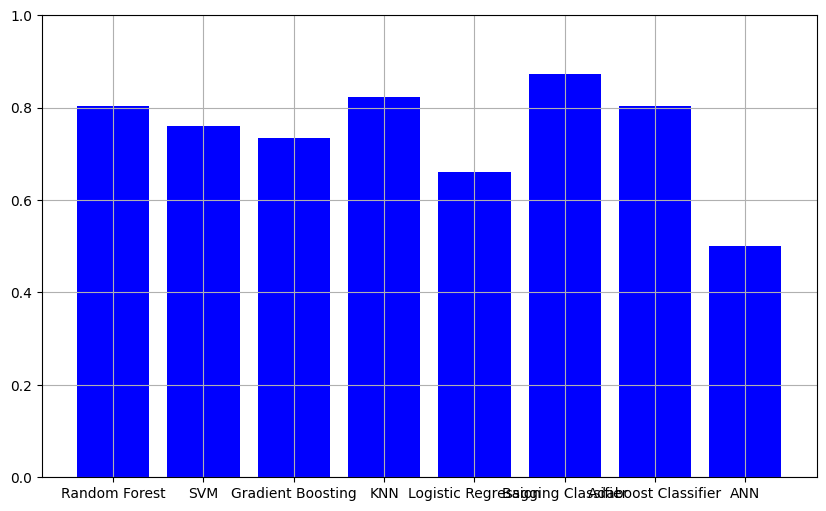

In [18]:
# Initialize classifiers with tuned hyperparameters
import matplotlib.pyplot as plt
classifiers = {
    "Random Forest": RandomForestClassifier(max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=300, random_state=42),
    "SVM": SVC(C=1, kernel='rbf', gamma='scale'),
    "Gradient Boosting": GradientBoostingClassifier(learning_rate=0.1, max_depth=5, n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(metric='manhattan', n_neighbors=5, weights='distance'),
    "Logistic Regression": LogisticRegression(max_iter=1000, C=100, penalty='l2', solver='newton-cg'),
    "Bagging Classifier": BaggingClassifier(estimator=RandomForestClassifier(max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=300, random_state=42), n_estimators=200, random_state=42),
    "Adaboost Classifier": AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=300, random_state=42), n_estimators=100, learning_rate=1, random_state=42)
}

# Train classifiers and evaluate
classification_reports = {}
balanced_scores = {}
normal_scores = {}
for name, clf in classifiers.items():
    clf.fit(X_train_res, y_train_res)
    y_pred = clf.predict(X_test_scaled)
    balanced_scores[name] = balanced_accuracy_score(y_test, y_pred)
    normal_scores[name] = accuracy_score(y_test, y_pred)

# Artificial Neural Network
model = Sequential([
    Dense(X_train_res.shape[1], activation='relu', input_shape=(X_train_res.shape[1],)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_res, y_train_res, epochs=20, batch_size=32, verbose=0)

# Evaluate ANN
y_pred = (model.predict(X_test) > 0.5).astype("int32")
balanced_scores["ANN"] = balanced_accuracy_score(y_test, y_pred)
normal_scores["ANN"] = accuracy_score(y_test, y_pred)

# Print the scores
print("Balanced Accuracy Scores:")
for name, score in balanced_scores.items():
    print(f"{name}: {score:.4f}")

print("\nNormal Accuracy Scores:")
for name, score in normal_scores.items():
    print(f"{name}: {score:.4f}")

#Representation of Accuracies
plt.figure(figsize=(10, 6))
plt.bar(balanced_scores.keys(), balanced_scores.values(), color='blue')
plt.ylim(top = 1)
plt.grid()

In [19]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

cv = 5  # Number of folds
cv_balanced = {}

for name, model in classifiers.items():
    # Perform K-Fold Cross-Validation
    balanced_accuracy = cross_val_score(model, X_train_res, y_train_res, scoring='balanced_accuracy', cv=cv)

    # Convert scores to positive MAE scores


    # Store the results
    cv_balanced[name] = balanced_accuracy

    # Print average MAE for each model
    print(f"{name} Average MAE over {cv} folds: {np.mean(balanced_accuracy):.4f} (+/- {np.std(balanced_accuracy):.4f})")

Random Forest Average MAE over 5 folds: 0.8597 (+/- 0.0534)
SVM Average MAE over 5 folds: 0.8088 (+/- 0.0543)
Gradient Boosting Average MAE over 5 folds: 0.8347 (+/- 0.0646)
KNN Average MAE over 5 folds: 0.8016 (+/- 0.0308)
Logistic Regression Average MAE over 5 folds: 0.7744 (+/- 0.0352)
Bagging Classifier Average MAE over 5 folds: 0.8686 (+/- 0.0554)
Adaboost Classifier Average MAE over 5 folds: 0.8669 (+/- 0.0607)
